<h1 class="text-center">PHYSICAL METEOROLOGY LABORATORY ASSIGNMENT ONE</h1>

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.signal import savgol_filter

In [473]:
data = readsav('atsc5010_Lab1.idlsav') #reading the IDL file
data

{'lwc_cdp': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'lwc_pvm': array([-0.00038572, -0.00044236, -0.00051077, ..., -0.00664964,
        -0.0066724 , -0.00661221], dtype=float32),
 'n_cdp': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'n_fssp': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'wwind': array([-0.4114728 , -0.40310872, -0.4055567 , ..., -0.14173916,
        -0.3162707 , -0.25796223], dtype=float32)}

In [474]:
# Data Variables
lwc_cdp = data['lwc_cdp']
lwc_pvm = data['lwc_pvm']
n_cdp = data['n_cdp']
n_fssp = data['n_fssp']
wwind = data['wwind']  

In [475]:
#compute element vector for 10 Hz and 25 Hz of data
hertz_10 = np.linspace(-5, 5, 1001)
hertz_25 = np.linspace(-5, 5, 2501)

<h3>PLOTS</h3>

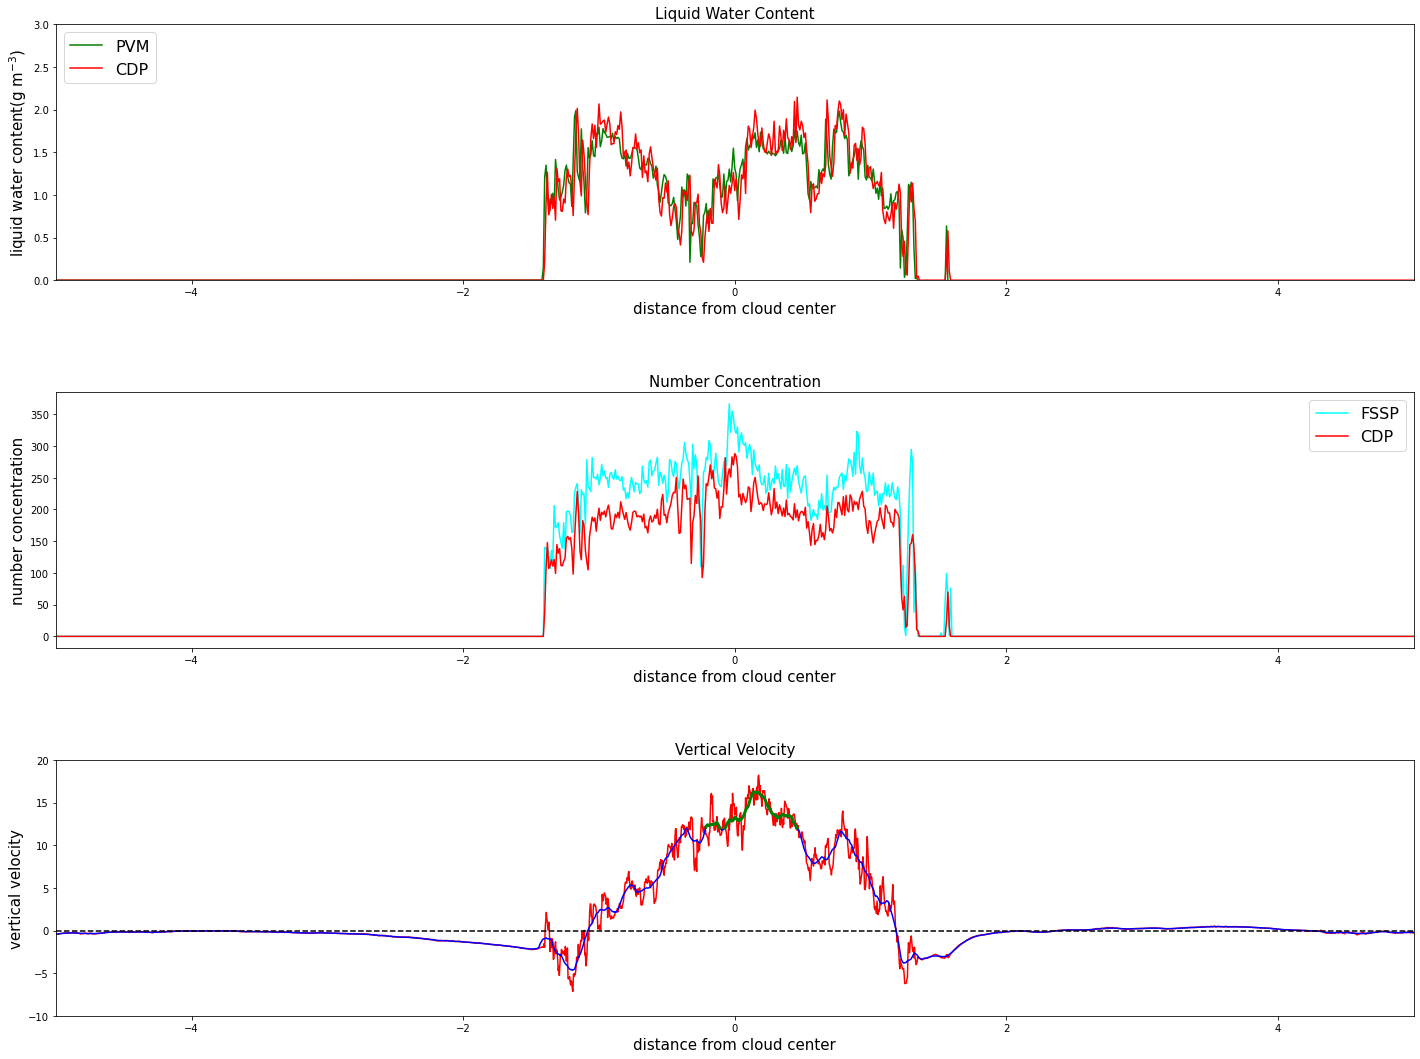

In [476]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 15)) #creating subplots
ax = ax.flatten()
for i, v in enumerate(ax):
    #plot one
    if i == 0:
        ax[i].plot(hertz_10, lwc_pvm, color='green', label='PVM')
        ax[i].plot(hertz_10, lwc_cdp, color='red', label='CDP')
        ax[i].set_xlim([-5, 5])
        ax[i].set_ylim([0, 3])
        ax[i].set_title('Liquid Water Content', fontsize=15)
        ax[i].set_xlabel('distance from cloud center',  fontsize=15)
        ax[i].set_ylabel('liquid water content(g m$^{-3}$)',  fontsize=15)
        ax[i].legend(loc='upper left', fontsize=16)
    #plot two
    if i == 1:
        ax[i].plot(hertz_10, n_fssp, color='cyan', label='FSSP')
        ax[i].plot(hertz_10, n_cdp, color='red', label='CDP')
        ax[i].set_xlim([-5, 5])
        ax[i].set_title('Number Concentration', fontsize=15)
        ax[i].set_xlabel('distance from cloud center',  fontsize=15)
        ax[i].set_ylabel('number concentration',  fontsize=15)
        ax[i].legend(loc='upper right', fontsize=16)
    #plot three
    if i == 2:
        ax[i].plot(hertz_25, wwind, color='red')
        #smoothing data
        smoothed = savgol_filter(wwind, 25, 1) # window size 25, polynomial order 1
        ax[i].plot(hertz_25, smoothed, color='blue')
        #in excess of 12
        excess_12 = smoothed[::]
        #excess_12 = smoothed[smoothed <= 12]
        excess_12[smoothed <= 12] = np.nan
        ax[i].plot(hertz_25, excess_12, color='green', linewidth=3)
        ax[i].axhline(y=hertz_25.mean(), color='black' ,linestyle='--')
        ax[i].set_xlim([-5, 5])
        ax[i].set_ylim([-10, 20])
        ax[i].set_title('Vertical Velocity', fontsize=15)
        ax[i].set_xlabel('distance from cloud center',  fontsize=15)
        ax[i].set_ylabel('vertical velocity',  fontsize=15)
    
    #adjust subplot size
    fig.tight_layout(h_pad=4.5)
    
    #save plot
    fig.savefig('images/oteng_atsc5010_lab1_window-plot.jpg', dpi=100)

<h1 class="text-center">CORRELATION PLOTS</h1>

<h3>Correlation Plot #1</h3>

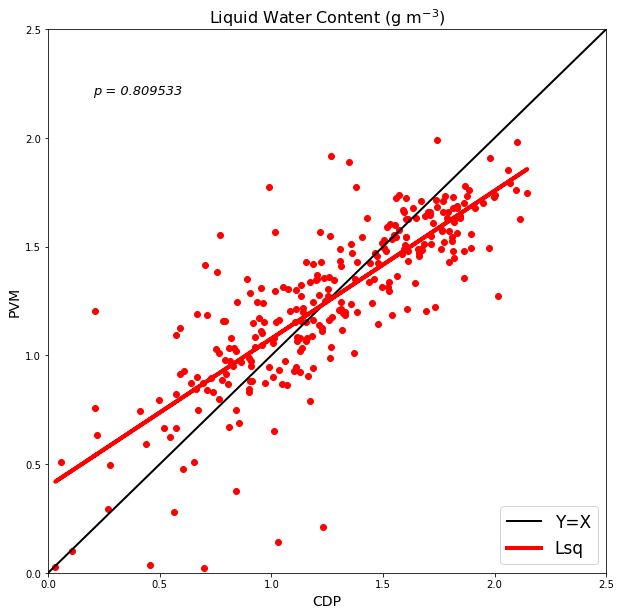

In [477]:
# CDP and PVM LWC’s values greater than 0.02 g/m3.
mask = np.logical_and(lwc_cdp > 0.02, lwc_pvm > 0.02)
greater_cdp = lwc_cdp[mask]
greater_pvm = lwc_pvm[mask]

# 1:1 line.
lims = np.linspace(0, 2.5)

#line of best fit
theta = np.polyfit(greater_cdp, greater_pvm,1)
# Now, calculating the y-axis values against x-values according to the parameters theta0, theta1 and greater_cdp
y_line = theta[1] + theta[0] * greater_cdp
# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=greater_cdp, y=greater_pvm, c='red')
ax.plot(lims, lims, color='black', linewidth=2, label='Y=X')
#best fit
ax.plot(greater_cdp, y_line, color='red', linewidth=4, label='Lsq')
#correlation coefficient
correlation_coefficient = np.corrcoef(greater_cdp, greater_pvm)
correlation_coefficient = correlation_coefficient[0][1]
correlation_coefficient = round(correlation_coefficient, 6)
results = f'p = {correlation_coefficient}'

#output the correlation coefficient in graph
ax.text(0.2, 2.2, results, style ='italic',
        fontsize = 13, color ="black")

ax.set_xlim([0, 2.5])
ax.set_ylim([0, 2.5])

ax.set_xlabel('CDP', fontsize=14)
ax.set_ylabel('PVM', fontsize=14)
ax.set_title('Liquid Water Content (g m$^{-3}$)', fontsize=16)
ax.legend(loc='lower right', fontsize=17);
fig.savefig('images/oteng_atsc5010_lab1_correlation-plot-one.jpg', dpi=100)

### Correlation Plot #2

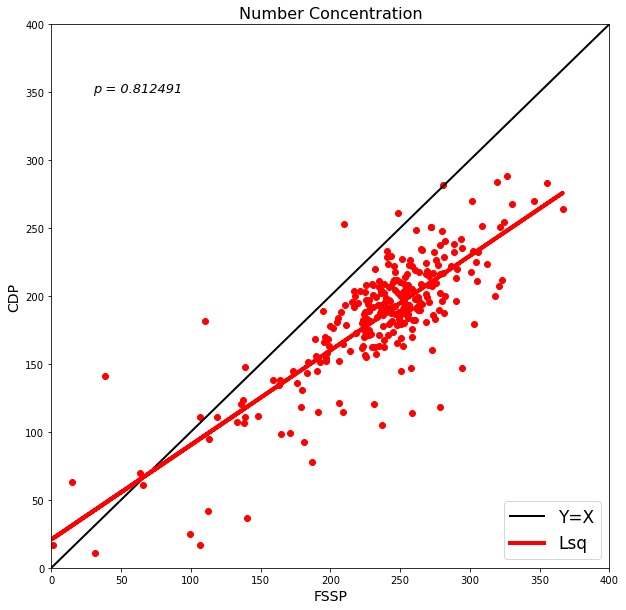

In [478]:
# Droplet Concentration values greater than 1.
masked = np.logical_and(n_fssp > 1, n_cdp > 1)
greater_fssp = n_fssp[masked]
greater_ncdp = n_cdp[masked]

# 1:1 line.
lims = np.linspace(0, 400)

#line of best fit
theta = np.polyfit(greater_fssp, greater_ncdp, 1)
# Now, calculating the y-axis values against x-values according to the parameters theta0, theta1 and greater_fssp
y_line = theta[1] + theta[0] * greater_fssp
# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=greater_fssp, y=greater_ncdp, c='red')
ax.plot(lims, lims, color='black', linewidth=2, label='Y=X')
#best fit
ax.plot(greater_fssp, y_line, color='red', linewidth=4, label='Lsq')
#compute correlation coefficient
correlation_coefficient = np.corrcoef(greater_fssp, greater_ncdp)
correlation_coefficient = correlation_coefficient[0][1]
correlation_coefficient = round(correlation_coefficient, 6)
results = f'p = {correlation_coefficient}'

#output the correlation coefficient in graph
ax.text(30, 350, results, style ='italic',
        fontsize = 13, color ="black")

ax.set_xlim([0, 400])
ax.set_ylim([0, 400])

ax.set_xlabel('FSSP', fontsize=14)
ax.set_ylabel('CDP', fontsize=14)
ax.set_title('Number Concentration', fontsize=16)
ax.legend(loc='lower right', fontsize=17);
fig.savefig('images/oteng_atsc5010_lab1_correlation-plot-two.jpg', dpi=100)